In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from catboost import CatBoostClassifier

## 1) Таргет

In [3]:
df1 = pd.read_csv('features.csv')

In [4]:
df2 = pd.read_csv('add.csv')

In [5]:
target = pd.read_csv('target.csv')

In [6]:
new_target = pd.read_csv('new_target.csv')

In [7]:
target['0'].sum()

41162

In [8]:
df1

,rub_amt_month=1,rub_amt_month=4,rub_amt_month=7,rub_amt_month=10,rub_mean_month=1,rub_mean_month=3,rub_mean_month=5,rub_mean_month=7,rub_mean_month=9,rub_mean_month=11,...,card_level=20,trades_contr_month=1,trades_contr_month=3,trades_contr_month=5,trades_contr_month=7,trades_contr_month=9,trades_contr_month=11,target,user_id,date
0,45,166,261,333,3192.555556,2017.057851,2579.917949,2439.057471,2934.435435,2934.435435,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2017-07-01
1,35,156,275,368,5573.942857,3147.125984,2858.711443,2906.738182,2605.510204,3185.475543,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2017-08-01
2,56,183,286,399,2110.660714,3359.926471,2629.004717,2854.437063,2698.519886,3043.518868,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2017-09-01
3,58,194,315,410,1787.293103,2798.308725,2579.024896,2528.447619,2625.226221,2441.028446,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2017-10-01
4,58,207,328,447,2547.034483,2148.767442,2810.876984,2465.670732,2656.119403,2566.816239,...,0,23314.0,23314.0,23314.0,23314.0,23314.0,23314.0,0,0,2017-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501687,71,316,500,672,1574.281690,1211.075099,1069.842407,935.332000,941.131667,906.859097,...,0,37930.0,37930.0,45788.0,49861.0,97428.0,97428.0,1,125140,2018-02-01
1501688,80,333,519,680,1377.012500,1424.957364,1162.765152,1026.774566,1033.357724,978.301862,...,0,0.0,37930.0,37930.0,49861.0,97428.0,97428.0,1,125140,2018-03-01
1501689,47,305,476,662,947.702128,1345.843434,1213.434211,1109.407563,992.614035,989.521320,...,0,0.0,37930.0,37930.0,45788.0,49861.0,97428.0,0,125140,2018-04-01
1501690,72,270,515,699,919.694444,1110.155779,1268.962865,1109.155340,1008.865204,1016.723433,...,0,3214.0,3214.0,41144.0,41144.0,53075.0,100642.0,0,125140,2018-05-01


In [9]:
df2

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,333,334,335,336,337,338,339,340,341,342
0,1,23.00000,197.00000,741.37500,940.0000,1027.01380,1873.4188,2063.81000,2486.03200,0.0000,...,0.0,127.0,156009.0,5936.0,150232.0,241434.0,0.0,11.0,87.0,14.0
1,2,163.50000,445.33334,312.55884,481.8421,788.87573,1060.8512,1185.24620,1374.57390,0.0000,...,0.0,174.0,354622.0,20652.0,334912.0,473134.0,0.0,18.0,8.0,19.0
2,3,0.00000,0.00000,0.00000,0.0000,0.00000,0.0000,758.21155,688.49110,0.0000,...,0.0,36.0,19336.0,0.0,19336.0,50312.0,0.0,0.0,40.0,1.0
3,4,1119.80000,864.00000,864.00000,975.9200,1091.45720,1469.8785,1540.58860,2177.68950,0.0000,...,0.0,142.0,260462.0,30648.0,260462.0,304994.0,0.0,12.0,36.0,0.0
4,5,0.00000,1011.00000,864.33330,3106.3157,5164.56900,3293.0083,3169.45800,2963.84770,0.0000,...,0.0,178.0,135248.0,6008.0,131890.0,167442.0,4782.0,20.0,6.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125136,125713,1235.29160,1804.65900,1846.08340,1946.4445,2362.38920,1958.5000,1775.53610,1650.51170,608.3333,...,0.0,133.0,423198.0,8110.0,337961.0,417081.0,1682.0,18.0,33.0,58.0
125137,125714,470.00000,624.05554,1924.70210,1645.8750,1388.64210,925.6682,967.72516,904.96460,287.0000,...,0.0,147.0,83399.0,13466.0,82759.0,97795.0,471.0,23.0,15.0,7.0
125138,125715,0.00000,0.00000,0.00000,0.0000,0.00000,807.3750,1372.59630,1030.66860,0.0000,...,0.0,37.0,20301.0,0.0,17128.0,26556.0,0.0,1.0,0.0,16.0
125139,125716,0.00000,0.00000,0.00000,0.0000,0.00000,652.7619,914.81550,998.95404,0.0000,...,0.0,48.0,29100.0,0.0,28857.0,49712.0,0.0,7.0,4.0,18.0


In [14]:
df = df2.loc[target['0'] == 1]

In [15]:
new_target = new_target.loc[new_target['4_week'] > 0]

In [16]:
new_target = new_target.loc[target['0'] == 1]

In [17]:
new_target = new_target.drop(['Unnamed: 0'], axis = 1)

In [18]:
target = new_target['4_week']

In [19]:
target

14         34148.0
16        375022.0
18        411682.0
24        800076.0
28        101316.0
            ...   
125125     40282.0
125133     92421.0
125135     35209.0
125137     16979.0
125140     41144.0
Name: 4_week, Length: 36294, dtype: float64

In [20]:
df['target'] = target
df = df[pd.notna(df['target'])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df = df.drop('target', axis = 1)

In [22]:
df

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
14,671.95890,764.03360,794.81335,710.74170,658.94604,722.29700,743.05450,0.000,0.000,113.0000,...,759952.0,1303546.0,1945888.0,22415.0,22415.0,22415.0,46358.0,46358.0,6.0,6.0
16,0.00000,0.00000,0.00000,14462.54600,12752.29700,13795.07100,13755.95500,0.000,0.000,0.0000,...,397960.0,999338.0,1231670.0,0.0,66069.0,66069.0,80127.0,80127.0,0.0,1579.0
18,6671.12500,6205.62500,5175.51000,5511.25440,4870.94500,4543.82700,4255.17330,18597.334,18597.334,18597.3340,...,1826346.0,2567004.0,3063752.0,28825.0,41762.0,54203.0,54203.0,54203.0,117.0,102.0
24,2803.84620,2842.86350,2861.79520,2557.00830,2319.91670,2176.91850,2205.93500,5061.154,2796.647,2666.1943,...,856320.0,1202664.0,1653428.0,33628.0,94397.0,94397.0,94397.0,94397.0,36.0,36.0
28,0.00000,1579.00000,4609.70000,1486.54430,1625.29830,1627.06800,1526.15900,0.000,0.000,0.0000,...,1092592.0,1695916.0,1942208.0,14746.0,20937.0,48032.0,48032.0,48032.0,33.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125125,826.15390,883.53845,985.23440,1284.78080,1327.81560,1337.86400,1368.84510,201.000,201.000,1086.0000,...,283705.0,422123.0,534230.0,10327.0,30001.0,30001.0,30001.0,42974.0,132.0,10.0
125133,574.13635,1810.74280,1510.61540,1254.57600,1350.23610,1250.79820,1176.96720,0.000,0.000,0.0000,...,226162.0,320343.0,407643.0,24627.0,24627.0,24627.0,24627.0,24627.0,92.0,92.0
125135,313.54544,435.10000,404.75000,827.94116,1005.18960,835.03314,926.28450,0.000,167.500,152.0000,...,172676.0,259331.0,464280.0,2405.0,6339.0,13476.0,13476.0,15273.0,44.0,37.0
125137,624.05554,1924.70210,1645.87500,1388.64210,925.66820,967.72516,904.96460,287.000,235.500,10196.2500,...,308947.0,542305.0,690213.0,39826.0,39826.0,39826.0,39826.0,39826.0,55.0,28.0


## 2) Обучение

In [23]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [24]:
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler(with_mean=True, with_std=True)
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

#### мы будем использовать MAPE, которая показывает ошибку в процентах от истинного значения и R2, чтобы оценить качество.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)

p_test = lr.predict(x_test)

print('Test')
print('Test R2 %.3f\n' % r2_score(y_test, p_test))
print('Mape %.3f\n' % mape(y_test, p_test))


Test
Test R2 0.815

Mape 261.004



In [27]:
score_test = lr.score(x_test, y_test)
score_train = lr.score(x_train, y_train)
print("Train Score is :", score_train)
print("Test Score is :", score_test)

Train Score is : 0.8927954191477652
Test Score is : 0.8147306462499593


## Переобучается. Посмотрим регуляризацию

In [28]:
def mape_scorer(estimator, X_test, y_test):
    return -mape(np.exp(y_test), np.exp(estimator.predict(X_test)))

In [29]:
from sklearn.linear_model import RidgeCV, Ridge, Lasso, LassoCV, ElasticNetCV, SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [30]:
ridge = Ridge(alpha=.0005, fit_intercept=False).fit(x_train, y_train)
lasso = Lasso(alpha=.0001, fit_intercept=False, max_iter=20000).fit(x_train, y_train)

/home/pavel/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2111885701028996.8, tolerance: 2197112295926.778
  positive)


In [31]:
score_test = ridge.score(x_test, y_test)
score_train = ridge.score(x_train, y_train)
print("Train Score is :", score_train)
print("Test Score is :", score_test)

Train Score is : 0.787539201187883
Test Score is : 0.767990732154269


In [32]:
score_test = lasso.score(x_test, y_test)
score_train = lasso.score(x_train, y_train)
print("Train Score is :", score_train)
print("Test Score is :", score_test)

Train Score is : 0.787505429386788
Test Score is : 0.7704680285624878


In [33]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('regr', Lasso())
])

param_grid = [
    {
        'regr': [Lasso(), Ridge()],
        'regr__alpha': np.logspace(-4, 1, 6),
    },
    {
        'regr': [SGDRegressor()],
        'regr__alpha': np.logspace(-5, 0, 6),
        'regr__max_iter': [500, 1000],
    },
]

grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('regr',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='deprecat...
                               

In [34]:
grid.best_score_

0.7868502841010435

### 3) Топ фичи и интерпритация

In [35]:
cdf = pd.DataFrame(lasso.coef_, df.columns, columns=['coefficients'])
abs(cdf).sort_values(by=['coefficients'])[290:300]

,coefficients
3,156280.406913
47,165543.655340
60,168505.065045
29,171143.465186
167,202025.058886
259,208688.928949
61,223913.254463
260,291942.548863
168,296572.137986
277,715271.208516


In [36]:
df['target'] = target

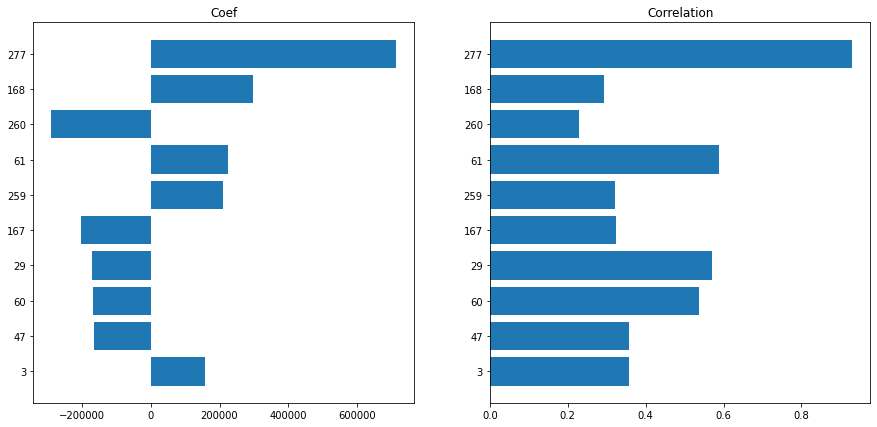

In [37]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title('Coef')
w = lasso.coef_
arg = np.argsort(np.abs(w))[-10:]
clmns = df.columns.values[arg]
w = w[arg]

x = np.arange(len(w))
plt.barh(x, w)
plt.yticks(x, clmns);

plt.subplot(1, 2, 2)
plt.title('Correlation')
corr = df.corr()

x = np.arange(len(w))
plt.barh(x, corr['target'][clmns])
plt.yticks(x, clmns);

#### 3   - Потраченные деньги 6 месяц
#### 47 - cреднее затраты за 1 месяц
#### 60 - # покупок за границей за 1 месяца
#### 29 - # F2F покупок за 9 месяцев
#### 259 - Средние траты в AIRLINES 3 месяца
#### 167 - Средние траты в REST 1 месяца
#### 61  - # покупок за границей за 3 месяц
#### 260 - # дней с последней поездки
#### 168 -  Средние траты в REST 3 месяца
#### 277 -  Средние траты в LUXURY 3 месяца

In [38]:
p_test = lasso.predict(x_test)

In [39]:
p_test = abs(p_test)

In [49]:
import seaborn as sns

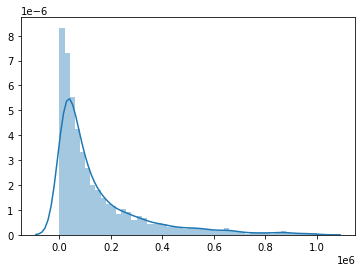

In [56]:
sns.distplot(y_test[y_test < 1000000].array)

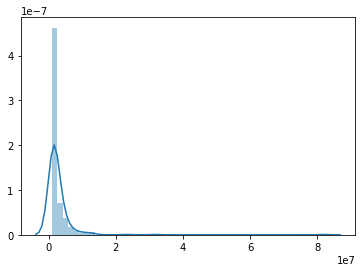

In [51]:
sns.distplot(y_test[y_test > 1000000].array)

In [52]:
bar = []
bar.append(y_test[y_test < 50000].size)
bar.append(y_test[y_test < 200000].size - y_test[y_test < 50000].size)
bar.append(y_test[y_test < 300000].size - y_test[y_test < 200000].size)
bar.append(y_test[y_test < 500000].size - y_test[y_test < 300000].size)
bar.append(y_test[y_test < 1000000].size - y_test[y_test < 500000].size)
bar.append(y_test[y_test >= 1000000].size)

In [53]:
s = pd.Series(np.array(bar), index = ['Бедные', 'Не такие бедные', 'Богатые', 'Очень богатые', 'Перестаньте', 'Кто за месяц тратит больше миллиона?'])

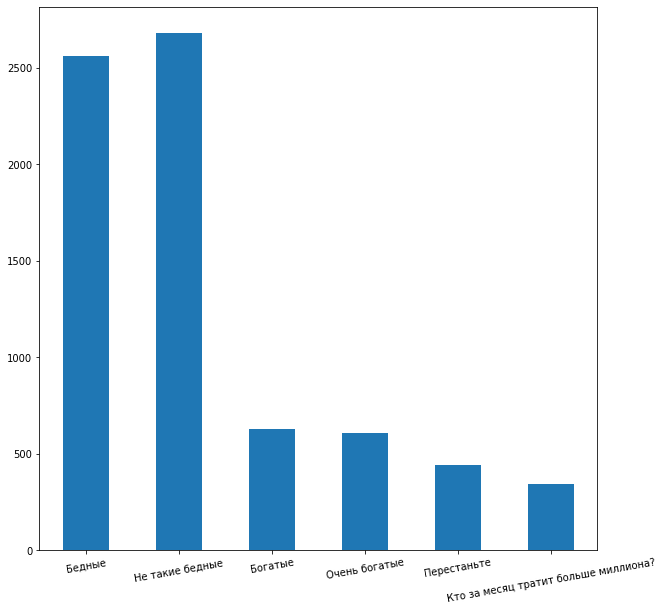

In [54]:
s.plot.bar(rot = 10, stacked=True, figsize = (10, 10))
plt.show()

In [348]:
p_bar = []
p_bar.append(y_test[p_test < 50000].size)
p_bar.append(y_test[p_test < 200000].size - y_test[p_test < 50000].size)
p_bar.append(y_test[p_test < 300000].size - y_test[p_test < 200000].size)
p_bar.append(y_test[p_test < 500000].size - y_test[p_test < 300000].size)
p_bar.append(y_test[p_test < 1000000].size - y_test[p_test < 500000].size)
p_bar.append(y_test[p_test >= 1000000].size)

In [349]:
sp = pd.Series(np.array(p_bar), index = ['Бедные', 'Не такие бедные', 'Богатые', 'Очень богатые', 'Перестаньте', 'Кто за месяц тратит больше миллиона?'])

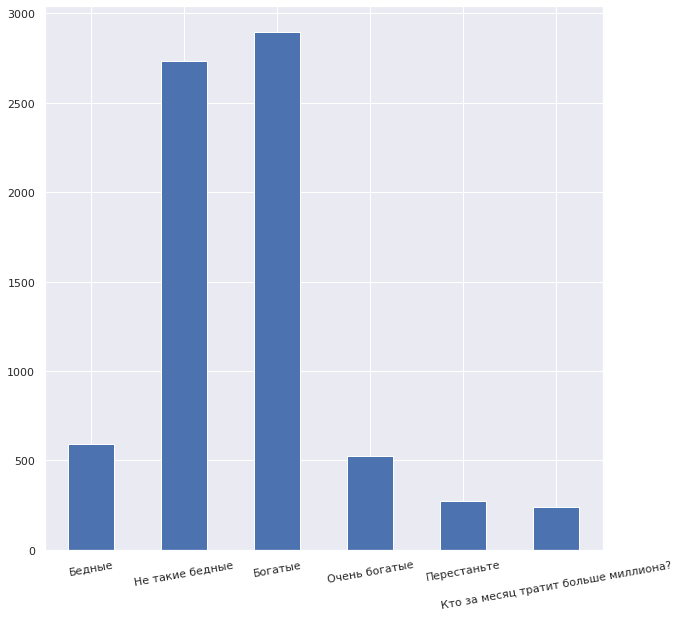

In [351]:
sp.plot.bar(rot = 10, stacked=True, figsize = (10, 10))
plt.show()

## Понимаем, что немного бедных сместилось в класс не таких бедных и богатых. В целом это не мешает бизнесу, так как человек который может потратить 50к может потратить и 80к.
## Те у кого много денег были предсказаны хорошо.